<a href="https://colab.research.google.com/github/juanqwerty773/labo-2/blob/main/cuarta%20clase%20(19_9)/codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')



MessageError: Error: credential propagation was unsuccessful

In [ ]:

# Ruta a la carpeta que te interesa
carpeta_path = '/content/drive'

# Ahora puedes usar esa ruta para acceder a los archivos dentro de esa carpeta
# Ejemplo: listar los archivos en la carpeta
import os
archivos = os.listdir(carpeta_path)
print(archivos)


In [ ]:
import pandas as pd
df = pd.read_csv("clase 4 (19_9) - Hoja 2.csv")
df.head()

,Vpp emit (V),Vpp_rec (mV),frec_emi(kHz),Escala Vpp emi (V),Escala Vpp reci(mV),Escala Temporal(mus),promedio,frec_GF
0,"15,09","10,1",39,5,5,10,16.0,39
1,15,"20,48","39,5",5,5,10,NaN,"39,5"
2,"14,9","47,53",40,5,10,10,NaN,40
3,"14,93","53,41","40,1",5,15,10,NaN,"40,1"
4,"14,94","44,89","40,2",5,15,10,NaN,"40,2"


In [ ]:
df['Vpp_rec (mV)'] = df['Vpp_rec (mV)'].str.replace(',', '.', regex=False)
df['Vpp_rec (mV)'] = pd.to_numeric(df['Vpp_rec (mV)'], errors='coerce')
df['frec_emi(kHz)'] = df['frec_emi(kHz)'].str.replace(',', '.', regex=False)
df['frec_emi(KHz)'] = pd.to_numeric(df['frec_emi(kHz)'], errors='coerce')


/tmp/ipython-input-1253568578.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


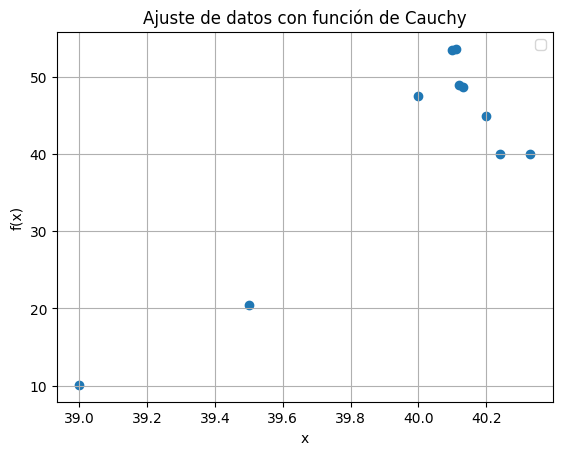

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
frecuencia = df['frec_emi(KHz)']
Vpp = df['Vpp_rec (mV)']

plt.scatter(frecuencia, Vpp)

plt.title('Ajuste de datos con función de Cauchy')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

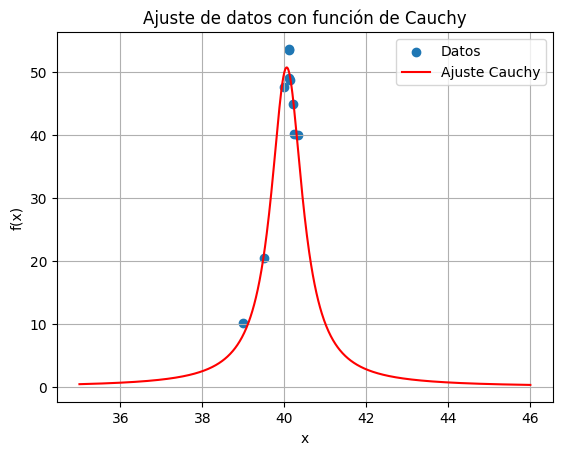

Parámetros ajustados:
 x0 = 40.056
 gamma = 0.468
 A = 74.466


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# ------------------------------
# Función de Cauchy (a ajustar)
def cauchy(x, x0, gamma, A):
    return A / (np.pi * gamma * (1 + ((x - x0) / gamma)**2))

# ------------------------------
# Datos de ejemplo (simulados)
x_data = frecuencia
#true_params = (0, 2, 10)  # x0, gamma, A
y_data = Vpp
#error_y = error_Vpp  # errores constantes

# ------------------------------
# Ajuste con curve_fit
popt, pcov = curve_fit(cauchy, x_data, y_data, absolute_sigma=True, maxfev=10000)
x0_fit, gamma_fit, A_fit = popt

# ------------------------------
# Graficar resultados
x_fit = np.linspace(35, 46, 1000)
y_fit = cauchy(x_fit, *popt)

#plt.errorbar(x_data, y_data, yerr=error_y, fmt='o', label='Datos',ecolor='black',capsize=2,markersize= 5,alpha = 0.5)
plt.scatter(x_data, y_data, label='Datos')
plt.plot(x_fit, y_fit, 'r-', label='Ajuste Cauchy')
plt.title('Ajuste de datos con función de Cauchy')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar parámetros ajustados
print(f'Parámetros ajustados:\n x0 = {x0_fit:.3f}\n gamma = {gamma_fit:.3f}\n A = {A_fit:.3f}')

In [ ]:
import pandas as pd
df = pd.read_csv("clase 4 (19_9) - Hoja 1-1.csv")
df.head()

,Vpp emit (V),Vpp_rec (mV),frec_emi(kHz),Escala Vpp emi (V),Escala Vpp reci(mV),Escala Temporal(mus),Unnamed: 6,frec_GF
0,"15,05","15,5","39,01",5,5,10,NaN,39
1,"14,96","41,57","39,49",5,10,10,NaN,"39,5"
2,"14,98","49,19",40,5,15,10,16.0,40
3,15,"40,75","40,11",5,15,10,NaN,"40,1"
4,15,"40,38","40,2",5,15,10,NaN,"40,2"


In [ ]:
df['Vpp_rec (mV)'] = df['Vpp_rec (mV)'].str.replace(',', '.', regex=False)
df['Vpp_rec (mV)'] = pd.to_numeric(df['Vpp_rec (mV)'], errors='coerce')
df['frec_emi(kHz)'] = df['frec_emi(kHz)'].str.replace(',', '.', regex=False)
df['frec_emi(KHz)'] = pd.to_numeric(df['frec_emi(kHz)'], errors='coerce')


/tmp/ipython-input-404419315.py:26: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x_fit_1, y_fit_1, 'r-', label='Ajuste Cauchy', linestyle='--')


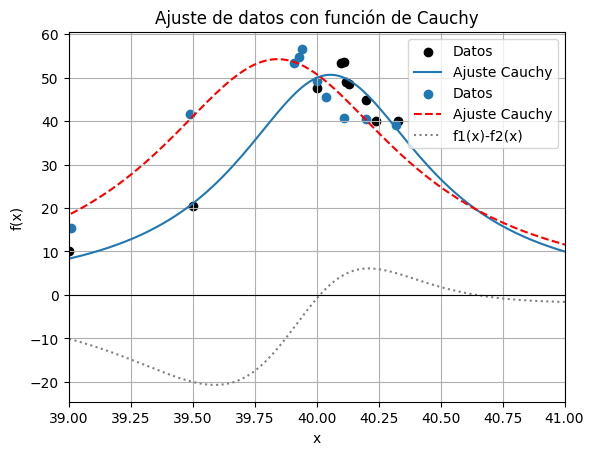

/tmp/ipython-input-404419315.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


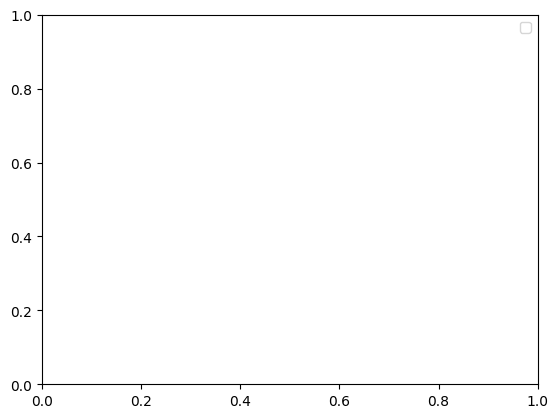

In [ ]:
frecuencia = df['frec_emi(KHz)']
Vpp = df['Vpp_rec (mV)']
# Datos de ejemplo (simulados)
x_data_1 = frecuencia
#true_params = (0, 2, 10)  # x0, gamma, A
y_data_1 = Vpp
#error_y = error_Vpp  # errores constantes

# ------------------------------
# Ajuste con curve_fit
popt_1, pcov = curve_fit(cauchy, x_data_1, y_data_1, absolute_sigma=True, maxfev=10000)
x0_fit_1, gamma_fit_1, A_fit_1 = popt_1

# ------------------------------
# Graficar resultados
x_fit_1 = np.linspace(35, 46, 1000)
y_fit_1 = cauchy(x_fit_1, *popt_1)
x_fit = np.linspace(35, 46, 1000)
y_fit = cauchy(x_fit, *popt)

#plt.errorbar(x_data, y_data, yerr=error_y, fmt='o', label='Datos',ecolor='black',capsize=2,markersize= 5,alpha = 0.5)
plt.scatter(x_data, y_data, label='Datos',color ='black')
plt.plot(x_fit, y_fit, label='Ajuste Cauchy')
#plt.errorbar(x_data, y_data, yerr=error_y, fmt='o', label='Datos',ecolor='black',capsize=2,markersize= 5,alpha = 0.5)
plt.scatter(x_data_1, y_data_1, label='Datos')
plt.plot(x_fit_1, y_fit_1, 'r-', label='Ajuste Cauchy', linestyle='--')
plt.plot(x_fit, y_fit -y_fit_1, ':', color='gray', label="f1(x)-f2(x)")  # diferencia
plt.axhline(0, color='black', linewidth=0.8)
plt.xlim(39, 41)
plt.title('Ajuste de datos con función de Cauchy')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


plt.legend()
plt.show()





In [ ]:

# Mostrar parámetros ajustados
diff = y_fit - y_fit_1
cambios = np.where(np.sign(diff[:-1]) != np.sign(diff[1:]))[0]

# puntos aproximados de cruce
for i in cambios:
    print(f"Entre x = {x_fit[i]} y x = {x_fit[i+1]}")
print(f'Parámetros ajustados:\n x0 = {x0_fit_1:.3f}\n gamma = {gamma_fit_1:.3f}\n A = {A_fit_1:.3f}')
from scipy.optimize import brentq

intersecciones = []
for i in cambios:
    root = brentq(lambda t: np.interp(t, x_fit, y_fit-y_fit_1), x_fit[i], x_fit[i+1])
    intersecciones.append(root)

print("Intersecciones en x:", intersecciones)


Entre x = 40.01001001001001 y x = 40.02102102102102
Entre x = 40.63763763763764 y x = 40.648648648648646
Parámetros ajustados:
 x0 = 39.843
 gamma = 0.604
 A = 102.886
Intersecciones en x: [40.01373565408193, 40.64327313494013]


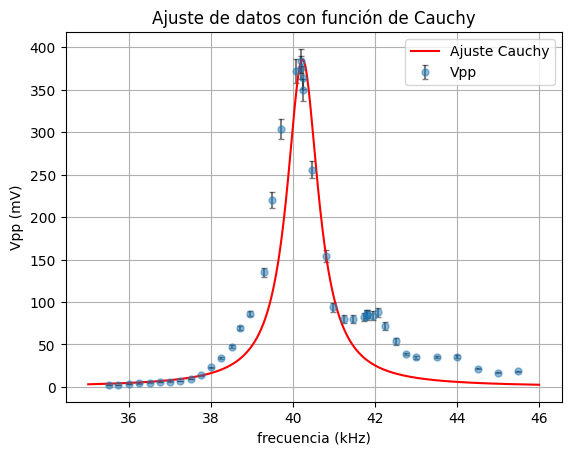

Parámetros ajustados:
 x0 = 40.230
 gamma = 0.468
 A = 566.758


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# ------------------------------
# Función de Cauchy (a ajustar)
def cauchy(x, x0, gamma, A):
    return A / (np.pi * gamma * (1 + ((x - x0) / gamma)**2))

# ------------------------------
# Datos de ejemplo (simulados)
x_data = frecuencia
#true_params = (0, 2, 10)  # x0, gamma, A
y_data = Vpp
error_y = error_Vpp  # errores constantes

# ------------------------------
# Ajuste con curve_fit
popt, pcov = curve_fit(cauchy, x_data, y_data, sigma=error_y, absolute_sigma=True)
x0_fit, gamma_fit, A_fit = popt

# ------------------------------
# Graficar resultados
x_fit = np.linspace(35, 46, 1000)
y_fit = cauchy(x_fit, *popt)

plt.errorbar(x_data, y_data, yerr=error_y, fmt='o', label='Vpp',ecolor='black',capsize=2,markersize= 5,alpha = 0.5)
plt.plot(x_fit, y_fit, 'r-', label='Ajuste Cauchy')
plt.title('Ajuste de datos con función de Cauchy')
plt.xlabel('frecuencia (kHz)')
plt.ylabel('Vpp (mV)')
plt.legend()
plt.grid(True)
plt.savefig("cauchy_loretziana.png", dpi=300, bbox_inches='tight')
plt.show()

# Mostrar parámetros ajustados
print(f'Parámetros ajustados:\n x0 = {x0_fit:.3f}\n gamma = {gamma_fit:.3f}\n A = {A_fit:.3f}')

In [ ]:
!cp "segunda clase/cauchy_loretziana.png"


cp: missing destination file operand after 'segunda clase/cauchy_loretziana.png'
Try 'cp --help' for more information.
